# Project 1
Yunus Emre Altun, Fabian Milla

**Dataset:**
[Energy Efficiency](https://archive.ics.uci.edu/dataset/242/energy+efficiency)

**1.** Business understanding and data collection  
   *a)* Inform yourself about the listed datasets. What are they about? What are the analysis goals?  
   *b)* Select the dataset that interests you the most. Create a python notebook and describe your understanding about the dataset.  
   *c)* Download the data and save it in a pandas data frame.

**Answer 1**  
*a)* The data deals with the energy efficiency of buildings, focusing on heating and cooling loads in relation to different building shapes. The dataset includes 8 input features wich describe the physical and structural properties of buildings. The goal of the analysis is to predict two target variables: heating load (Y1) and cooling load (Y2)  
*c)*  First import libraries, then create a new directory to save the dataset, and finally get the data from the URL.

In [1]:
from pathlib import Path
import pandas as pd
import urllib.request

excel_path = Path("datasets/energy_efficiency.xlsx")

# Does data exist already 
if not excel_path.is_file():
    # create directory if it does not exist
    Path("datasets").mkdir(parents=True, exist_ok=True)
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
    # download data
    urllib.request.urlretrieve(url, excel_path)
   
# load data in pandas dataframe
data = pd.read_excel(excel_path)

In [2]:
# print head to get an idea of what it looks like
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


**2.** Data exploration  
a) How many variables and instances does the dataset contain?  
b) Do the variables have understandable names? If not, think about renaming.  
c) Explore the data statistically and visually. How is the data distributed?  
d) Do you observe any correlations? If yes, between which variables?  

**Answer 2**  
*a)* The dataset contains 10 variables, 8 features, 2 targets, and 768 instances.  
*b)* The variables have understandable names. Only the orientation could be a bit confusing because integers were used instead of north, south, etc.  
*c)*  

In [3]:
# get first impressions
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


**Description**  
There are no null values, so no missing values.

In [4]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


**Description**  
*count:* Count of non-null values  
*mean:* Average value  
*std:* Standard deviation, indicating how much the values are spread around the mean  
*min:* Minimum value  
*25%:* 25th percentile, 25% of data is below the value  
*50%:* Median or 50th percentile  
*75%:* 75th percentile, 75% of data is below the value  
*max:* Maximum value

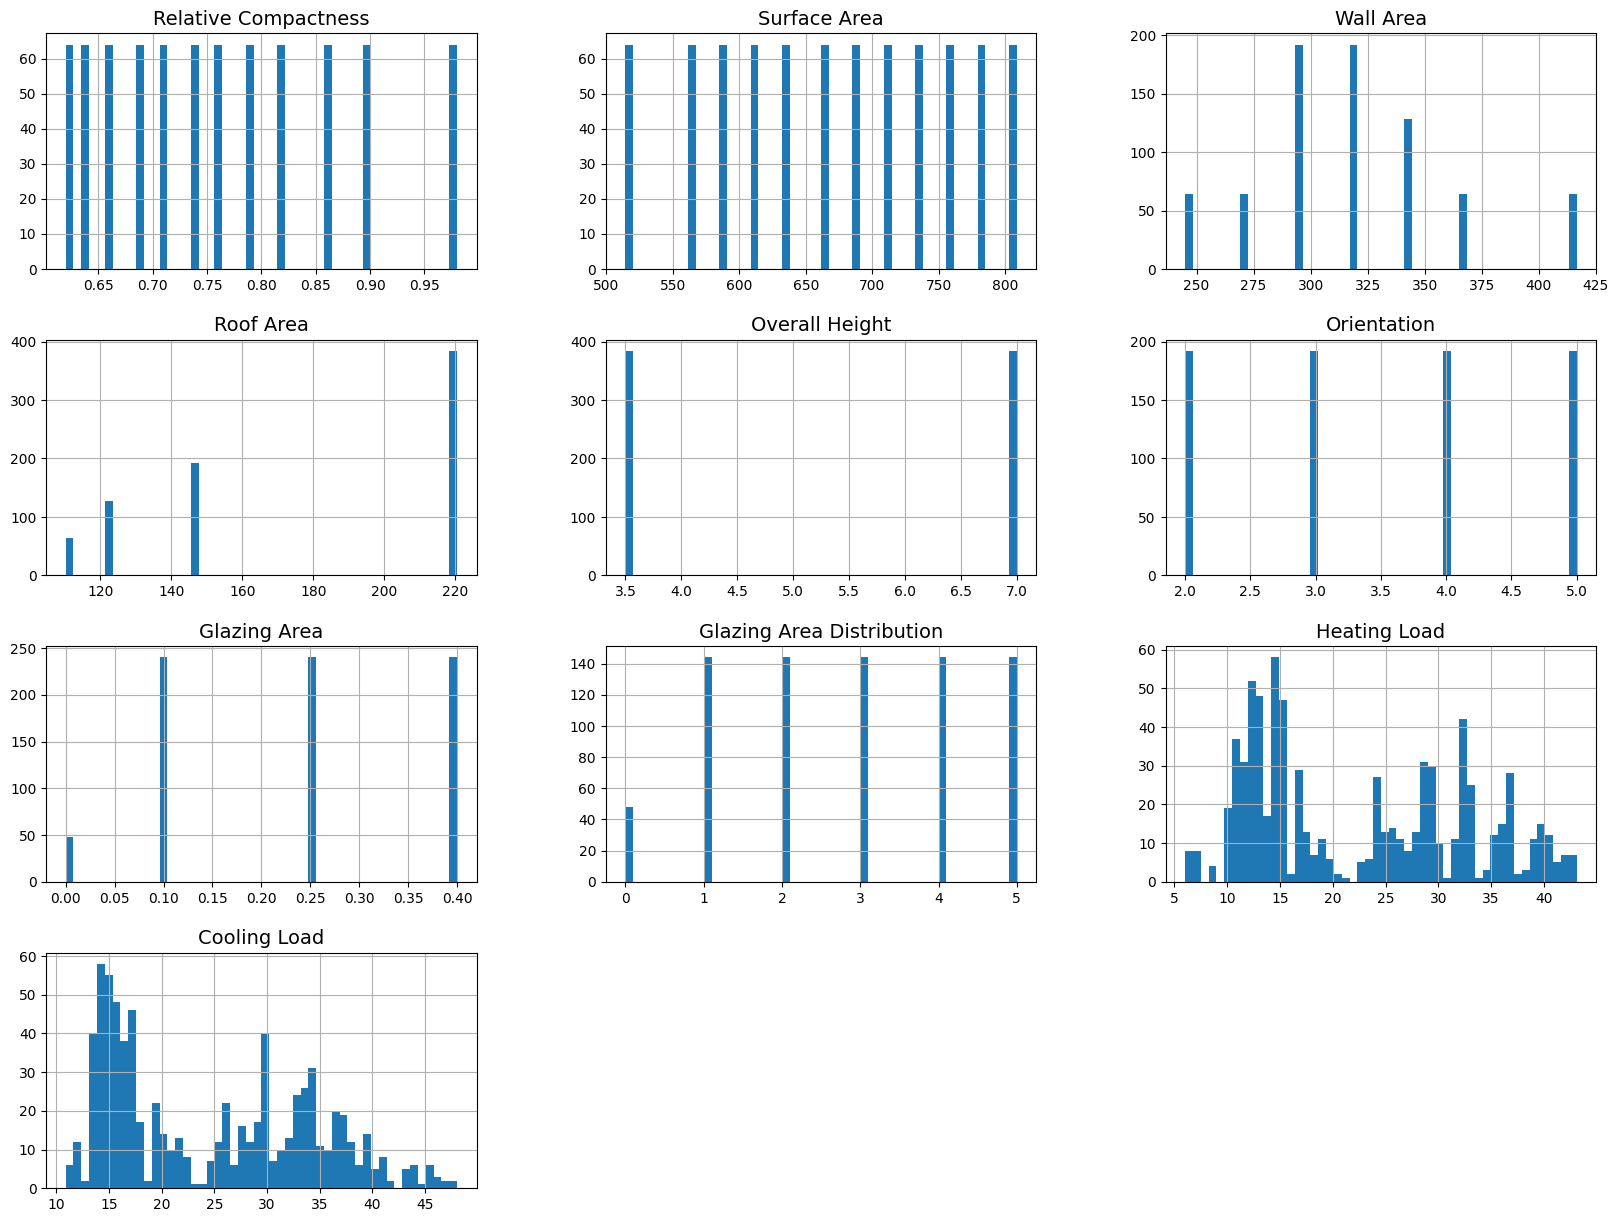

In [5]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# feature names
feature_names = {
    'X1': 'Relative Compactness',
    'X2': 'Surface Area',
    'X3': 'Wall Area',
    'X4': 'Roof Area',
    'X5': 'Overall Height',
    'X6': 'Orientation',
    'X7': 'Glazing Area',
    'X8': 'Glazing Area Distribution',
    'Y1': 'Heating Load',
    'Y2': 'Cooling Load'
}

# Plot
data.hist(bins=50, figsize=(20, 15))
for ax in plt.gcf().axes:
    feature = ax.get_title()
    ax.set_title(feature_names.get(feature, feature))
plt.show()

**Antwort:**
Die Verteilungen der Variablen im Datensatz zeigen unterschiedliche Muster:

- **Relative Compactness**: Diese Variable hat eine relativ gleichmäßige Verteilung und weist eine breite Streuung der Werte auf.
- **Surface Area**: Ähnlich wie bei der ersten Variablen scheint die `Surface Area` ebenfalls eine gleichmäßige Verteilung mit einem Bereich zwischen 500 und 800 zu haben.
- **Wall Area**: Hier sehen wir eine ungleichmäßige Verteilung, mit Werten, die hauptsächlich zwischen 250 und 400 liegen. Es gibt einige Ausreißer im Bereich von etwa 425.
- **Roof Area**: Diese Variable weist eine starke Konzentration bei bestimmten Werten auf (in der Nähe von 120 bis 160), mit vereinzelten Werten bis 220.
- **Overall Height**: Diese Variable hat eine nahezu konstante Verteilung, wobei der Wertebereich von 3,5 bis 7 reicht.
- **Orientation**: Es gibt fünf verschiedene Orientierungen, die gleichmäßig im Datensatz vertreten sind, jedoch scheinen einige Werte wiederholt zu erscheinen.
- **Glazing Area**: Diese Variable zeigt eine starke Konzentration bei sehr niedrigen Werten, hauptsächlich zwischen 0 und 0,04, was auf eine starke Fokussierung auf einen bestimmten Bereich hinweist.
- **Glazing Area Distribution**: Auch hier sind die Werte relativ gleichmäßig verteilt, mit einer höheren Häufigkeit bei den Werten 1 bis 3.
- **Heating Load**: Die Verteilung der `Heating Load` ist breit, aber mit einer höheren Häufigkeit bei den unteren Werten, während die Werte ab etwa 25 bis 40 weniger häufig vorkommen.
- **Cooling Load**: Die Verteilung des `Cooling Load` zeigt eine deutlich ungleichmäßige Verteilung, mit einer höheren Häufigkeit im Bereich von 10 bis 30 und einem schnell abnehmenden Vorkommen bei höheren Werten.

Insgesamt zeigen die Daten, dass einige Variablen relativ gleichmäßig verteilt sind, während andere (insbesondere die Zielvariablen) eine eher ungleichmäßige Verteilung mit gewissen Konzentrationen aufweisen.


**Discription**  


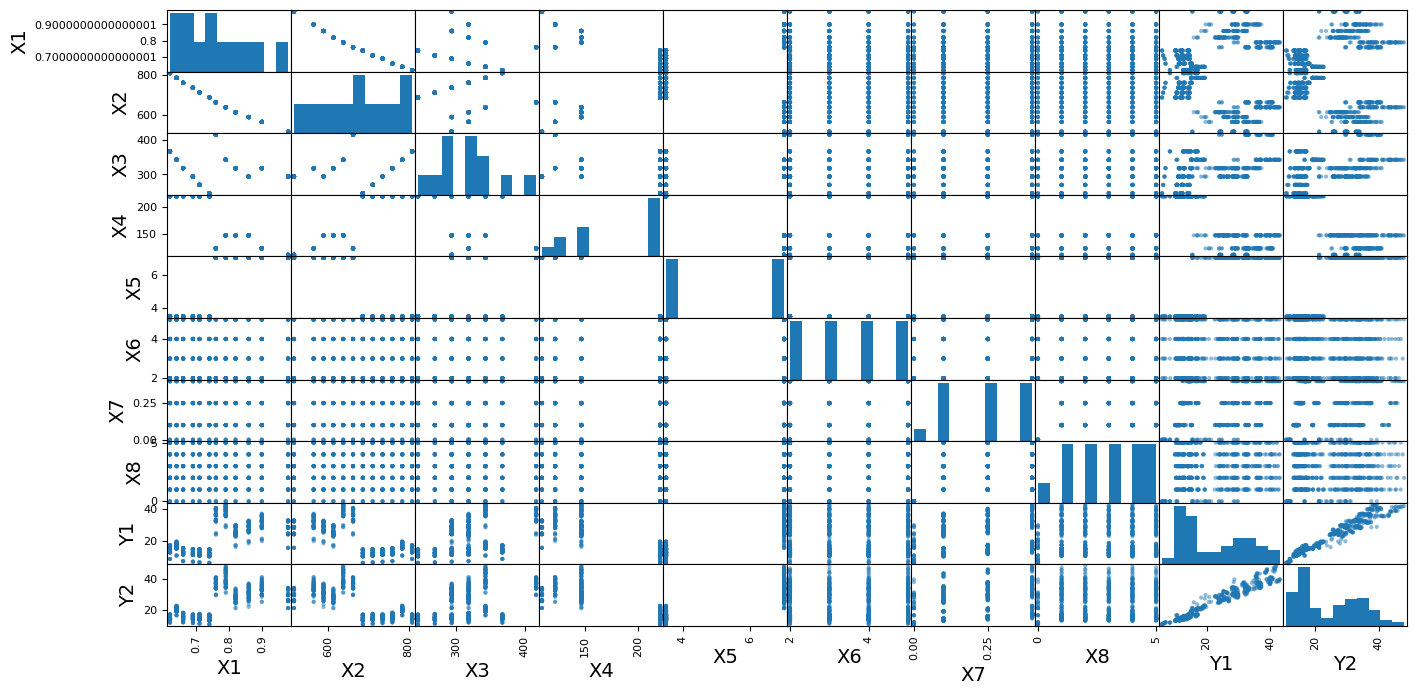

In [9]:
from pandas.plotting import scatter_matrix

scatter_matrix(data, figsize=(16, 8))
plt.show()

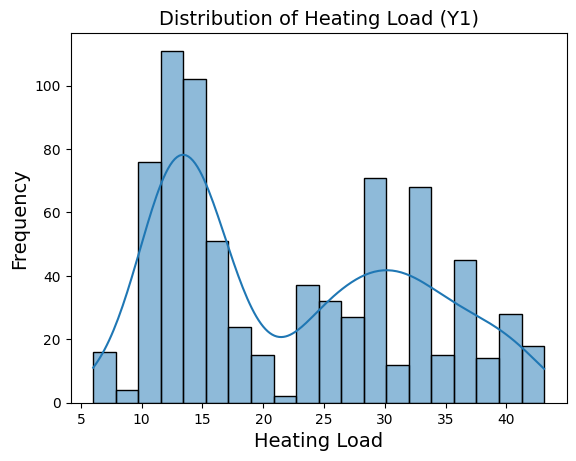

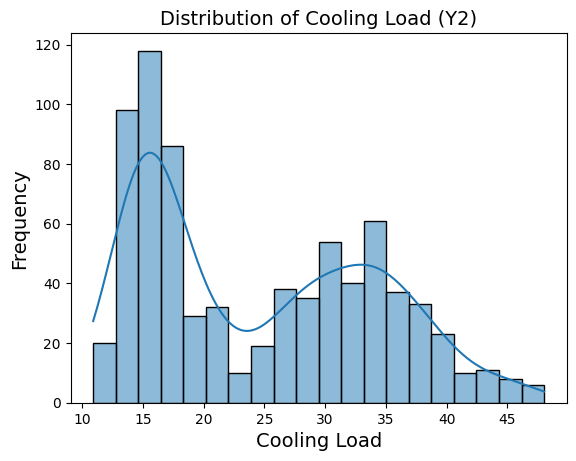

In [6]:
#TODO was genau sagen mir die plots?

import seaborn as sns

sns.histplot(data['Y1'], kde=True, bins=20)
plt.title('Distribution of Heating Load (Y1)')
plt.xlabel('Heating Load')
plt.ylabel('Frequency')
plt.show()

sns.histplot(data['Y2'], kde=True, bins=20)
plt.title('Distribution of Cooling Load (Y2)')
plt.xlabel('Cooling Load')
plt.ylabel('Frequency')
plt.show()

Die Plots zeigen die Verteilung der Heizlast (Y1) und Kühlungsanforderungen (Y2) in den Gebäuden. Sie helfen dabei, Muster oder Ausreißer in den Daten zu identifizieren, wie zum Beispiel:

Heizlast (Y1): Gibt an, wie viel Energie zum Heizen der Gebäude benötigt wird. Eine gleichmäßige Verteilung oder Konzentration in bestimmten Bereichen zeigt die typischen Heizanforderungen.

Kühlungsanforderungen (Y2): Zeigt die Energieanforderungen zur Kühlung der Gebäude. Hier kann eine ähnliche Analyse aufzeigen, welche Gebäude mehr Kühlung benötigen.

Diese Informationen helfen, die Energieeffizienz und -anforderungen der Gebäude zu verstehen.

*d)*

In [7]:
corr_matrix = data.corr()
print(corr_matrix)

              X1            X2            X3            X4            X5  \
X1  1.000000e+00 -9.919015e-01 -2.037817e-01 -8.688234e-01  8.277473e-01   
X2 -9.919015e-01  1.000000e+00  1.955016e-01  8.807195e-01 -8.581477e-01   
X3 -2.037817e-01  1.955016e-01  1.000000e+00 -2.923165e-01  2.809757e-01   
X4 -8.688234e-01  8.807195e-01 -2.923165e-01  1.000000e+00 -9.725122e-01   
X5  8.277473e-01 -8.581477e-01  2.809757e-01 -9.725122e-01  1.000000e+00   
X6  4.678592e-17 -3.459372e-17 -2.429499e-17 -5.830058e-17  4.492205e-17   
X7 -2.960552e-15  3.636925e-15 -8.567455e-17 -1.759011e-15  1.489134e-17   
X8 -7.107006e-16  2.438409e-15  2.067384e-16 -1.078071e-15 -2.920613e-17   
Y1  6.222719e-01 -6.581199e-01  4.556714e-01 -8.618281e-01  8.894305e-01   
Y2  6.343391e-01 -6.729989e-01  4.271170e-01 -8.625466e-01  8.957852e-01   

              X6            X7            X8        Y1        Y2  
X1  4.678592e-17 -2.960552e-15 -7.107006e-16  0.622272  0.634339  
X2 -3.459372e-17  3.636925e-1

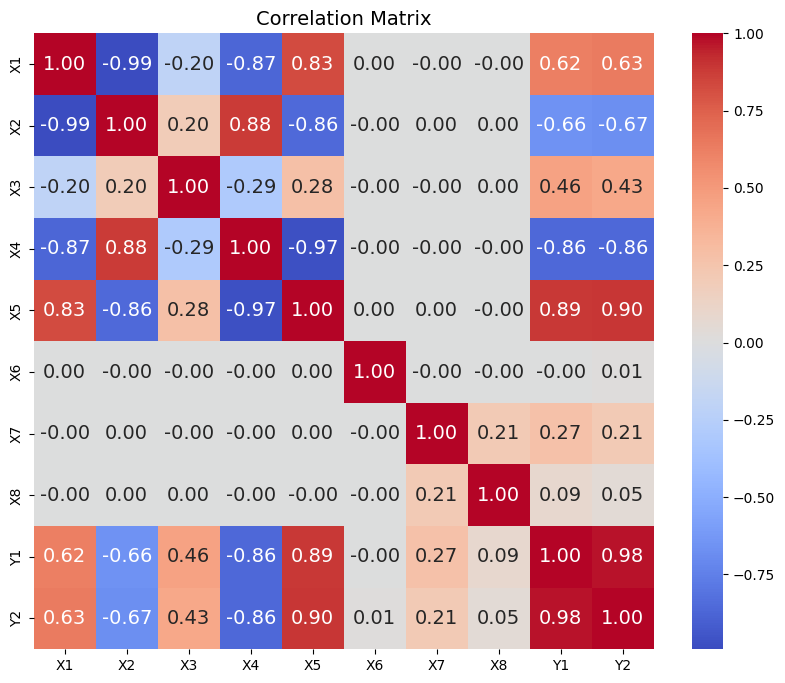

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**TODO** Interpretiere

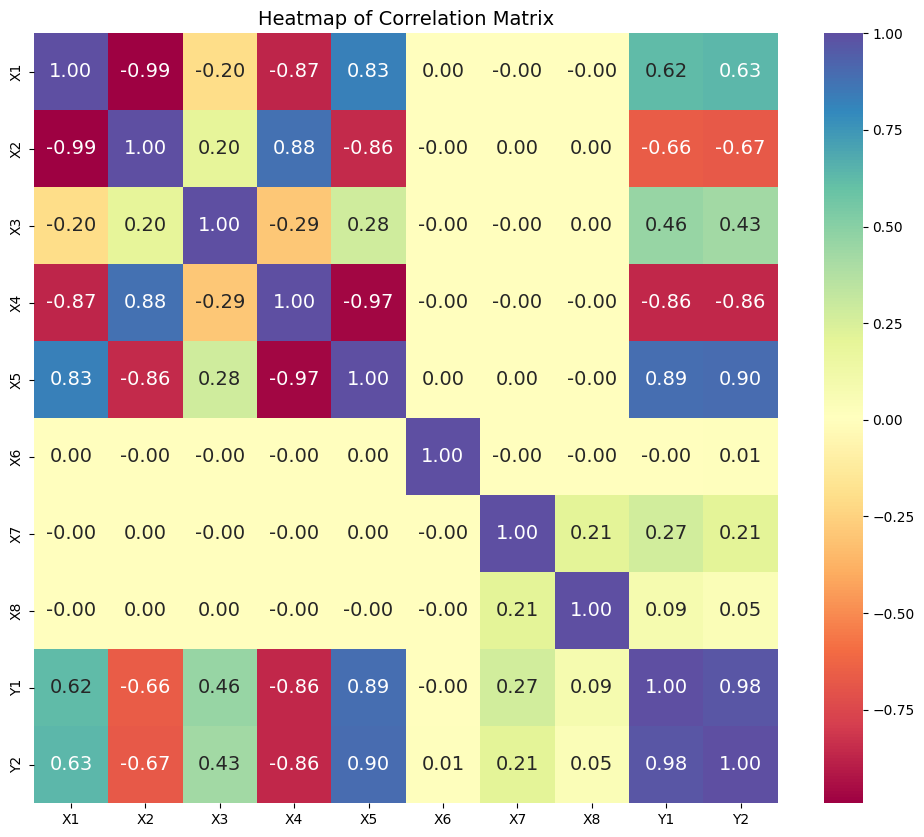

In [17]:
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='Spectral', fmt=".2f")
plt.title("Heatmap of Correlation Matrix")
plt.show()

**TODO** Interpretiere

**3.** Data preparation  
a) Is data cleaning needed?  
b) Is data encoding needed?  
c) Do you think any further feature engineering would be useful?  
d) Split the data into data subsets.  
e) Is feature scaling needed?  


In [10]:
data.isna().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [11]:
data.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

**Answer 3**  
*a)* No, the data does not need to be cleaned.  
*b)* All the feature data is only numeric, and also the target variable is already numeric, so no more encoding is required.  
*c)* TODO  
*d)*  

In [ ]:
X = data.drop(columns=['Y1', 'Y2'])
y = data[['Y1', 'Y2']]
X.head()

,Y1,Y2
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28


In [16]:
y.head()

,Y1,Y2
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28


**Discription**  
Split data into X and targets in y

In [19]:
from sklearn.model_selection import train_test_split

seed_val = 42

# Split the data into 80% train set + 20 % temp set (= val + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=seed_val)

# Split the temp set further into 50% val + 50 % test set (i.e. train/val/test = 80%/10%/10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=seed_val)

In [20]:
print("Size of TRAIN data:", len(X_train))
print("Size of VAL data:", len(X_val))
print("Size of TEST data:", len(X_test))

Size of TRAIN data: 614
Size of VAL data: 77
Size of TEST data: 77


**4.** Modelling: Regression (= model 1)  
a) Define again the analysis goal. What is the target variable that you want to predict? (Remark - If
you use the “energy” dataset: It is enough to predict only one target variable.) Which features
do you want to use?  
b) Select a model, define a performance metric, select a learning algorithm.  
c) Run the learning algorithm. Monitor the learning curves. What do you observe? How is the
model performance?  
d) Is fine-tuning needed? Try, e.g., other hyperparameters.  
e) Try regularization techniques. What is the effect?  
f) Save the final model, perform a final evaluation and demonstrate how it can be used for making
predictions.


**5.** Modelling: Classification (= model 2)  
a) Define again the analysis goal. What is the target variable that you want to predict? Which features do you want to use?  
i. Remark - If you use the “bike” or the “energy” dataset: You first need to create a categorical class variable by binning the originally continuous target variable. You can use the code below for that.  
b) Train a logistic regression model for multinomial classification.  
c) Evaluate the performance on the train and the validation subset. Which performance measures do you use, and why? How good is the performance? Is the performance similar for all classes?  
d) Do you have any idea, if something coul d be improved for the classification model?  
i. If yes, make those adaptations and train a new classification model. Afterwards measure the performance on the validation set. Has the performance improved?  
e) Optional: Train another type of a classification model (e.g., decision tree, or SVM).  
f) Select your best classification model (from b), d), and e)) and measure the performance on the
test subset.


**6.** Comparison of regression (model 1) and classification (model 2)  
a) Describe advantages of the regression model, and advantages of the classification model.  
b) Which of the two models is more suited for the original analysis goal?